# Итоговый проект "Знакомство с языком Python"
## Jupyter Notebook и несколько слов об аналитике
### f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
#### 1. Определить корни
#### 2. Найти интервалы, на которых функция возрастает
#### 3. Найти интервалы, на которых функция убывает
#### 4. Построить график
#### 5. Вычислить вершину
#### 6. Определить промежутки, на котором f > 0
#### 7. Определить промежутки, на котором f < 0

In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [45]:
def func(x):
    f = a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e
    return f

In [55]:
a,b,c,d,e = -12, -18, 5, 10, -30
limit = 100
step = 0.001


In [56]:
x = np.arange(-limit,limit + step, step)

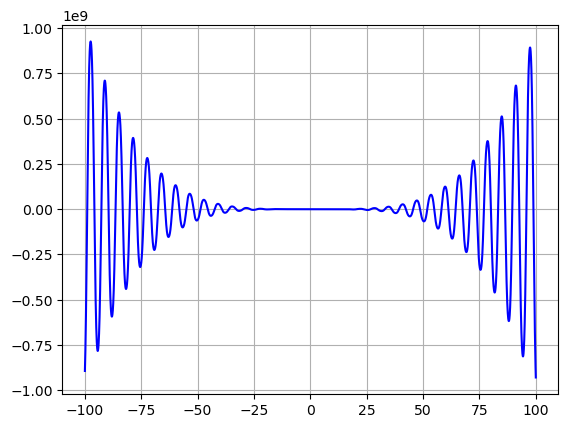

In [57]:
plt.plot(x,func(x), 'b')
plt.grid()

## По графику данной функции видно, что у нее бесконечное множество корней и точек перегиба

In [66]:
step_acr = 0.0000001
limit = 10
line_style = '-'
color = 'b'
direct_up = True

In [67]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style

In [68]:
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [69]:
x_change = [(-limit, "limit")]

In [70]:
global direct_up
for i in range(len(x) - 1):
    if func(x[i]) > 0 and func(x[i + 1]) < 0 or func(x[i]) < 0 and func(x[i + 1]) > 0:
        x_acr = np.arange(x[i], x[i + 1] + step_acr, step_acr)
        for j in range (len(x_acr) - 1):
            if func(x_acr[j]) > 0 and func(x_acr[j + 1]) < 0 or func(x_acr[j]) < 0 and func(x_acr[j+1]) > 0:
                x_change.append((x_acr[j], 'zero'))
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            direct_up = False
            x_change.append((x[i], 'dir'))
    else:
        if func(x[i]) < func (x[i + 1]):
            direct_up = True
            x_change.append((x[i], 'dir'))
x_change.append((limit, 'limit'))

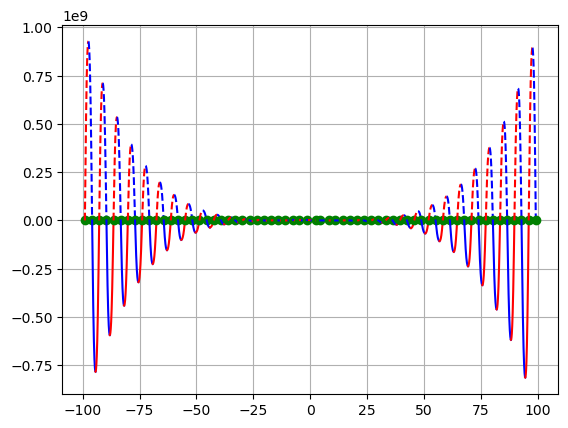

In [71]:
for i in range (len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.plot(x_change[i][0], func(x_change[i][0]), 'go')
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())
plt.grid()